In [375]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)




#clinical_data.head()
#mouse_data.count()
#Getting duplicate mouses that had treatment with two different drugs and deleting them
#	g989 	Stelasyn
#	g989 	Propriva
repeat_mouse = mouse_data.pivot_table(index=['Mouse ID'], aggfunc='size')
repeat_mouse.sort_values(ascending=False, na_position='first')

#mouse_data.set_index("Mouse ID")
#mouse_data.head()
mouse_data.drop(mouse_data[mouse_data['Mouse ID'] == 'g989'].index, inplace = True) 
mouse_data.loc[mouse_data['Mouse ID'] == 'g989']
mouse_data.count()
############################




mouse_data = mouse_data.drop_duplicates()
clinical_data = clinical_data.drop_duplicates()
join_data = clinical_data.merge(right=mouse_data)

join_data = join_data.sort_values(by='Mouse ID', ascending=True, na_position='first')
  
#join_data.count()

#join_data.isnull().values.any()
#mouse_data[["Mouse ID"]].groupby(["Mouse ID"]).count()
join_data.head(10)




# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
892,a203,35,61.931650,2,Infubinol
885,a203,0,45.000000,0,Infubinol
886,a203,5,48.508468,0,Infubinol
887,a203,10,51.852437,1,Infubinol
888,a203,15,52.777870,1,Infubinol
889,a203,20,55.173336,1,Infubinol
890,a203,25,56.793208,1,Infubinol
891,a203,30,59.523197,1,Infubinol
893,a203,40,63.593490,2,Infubinol
894,a203,45,67.973419,2,Infubinol


In [ ]:
## Tumor Response to Treatment

In [376]:


t_mean=join_data[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint'],as_index=False).mean()
t_mean.head(10)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [377]:
t_sem=join_data[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).sem() 
t_sem = t_sem.reset_index()
t_sem.head(10)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [379]:
t_mean_2 = t_mean.pivot(index='Timepoint', columns='Drug')
t_sem_2 = t_sem.pivot(index='Timepoint', columns='Drug')
t_mean_2.head(100)



Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.168130  43.944859  47.470830  46.851818  
10         49.423329  48.938560  42.531957  49.335368  48.689881  
15         51.359742  50.891769  41.495061  51.448025  50.779059  
20         54.364417  53.127384  40.238325  53.970080  53.170334  
25         57.482574  55.462490  38.974300  56.172821  55.432935  
30         59.809063  58.122548  38.703137  59.870528  57.713531  
35         62.420615  60.103457  37.451996  62.432021  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

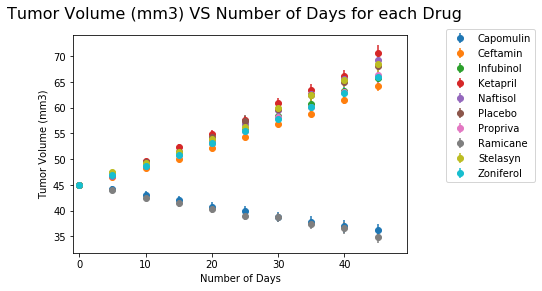

In [380]:
# Setting up the plot
fig, ax = plt.subplots()

drug_list = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
for drug in drug_list:
    ax.errorbar(t_mean_2.index, t_mean_2["Tumor Volume (mm3)"][drug], t_sem_2["Tumor Volume (mm3)"][drug], fmt="o")
    
ax.legend(loc='', numpoints=1)
ax.set_xlim(-1, max(t_mean_2.index) *1.1)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_xlabel("Number of Days")
ax.set_ylabel("Tumor Volume (mm3)")
fig.suptitle('Tumor Volume (mm3) VS Number of Days for each Drug', fontsize=16)
plt.show()

In [329]:
#t_mean_2['Tumor Volume (mm3)'][['Capomulin', 'Ceftamin']].plot(kind='bar', yerr=t_sem_2['Tumor Volume (mm3)'][['Capomulin', 'Ceftamin']].values.T, alpha = 0.7,error_kw=dict(ecolor='b'))





## Metastatic Response to Treatment

In [382]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

t_met=join_data[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint'],as_index=False).mean()
t_met.head(200)
t_met_sem=join_data[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint']).sem() 
t_met_sem = t_met_sem.reset_index()
#t_met_sem.head(100)

# Convert to DataFrame

# Preview DataFrame


In [383]:
t_met_sem=join_data[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint']).sem()
t_met_sem = t_met_sem.reset_index()
t_met_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [366]:
t_met_2 = t_met.pivot(index='Timepoint', columns='Drug')
t_met_sem_2 = t_met_sem.pivot(index='Timepoint', columns='Drug')

t_met_2.head(100)



Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.347826  0.120000  0.260870  0.166667  
10         0.619048  0.250000  0.523810  0.500000  
15         0.800000  0.333333  0.809524  0.809524  
20         1.000000  0.347826  0.947368  1.294118  
25         1.384615  0.652174  1.166667  1.687500  
30         1.666667  0.782609  1.411765  1.933333  
35         2.333333  0.952381  1.533333  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [384]:
%matplotlib inline

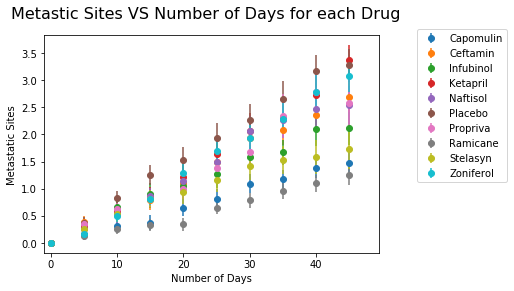

<Figure size 576x792 with 0 Axes>

In [385]:
fig, ax = plt.subplots()
plt.figure(figsize=(8,11))
drug_list = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
for drug in drug_list:
    ax.errorbar(t_met_2.index, t_met_2["Metastatic Sites"][drug], t_met_sem_2["Metastatic Sites"][drug], fmt="o")
ax.legend(loc='', numpoints=1)
ax.set_xlim(-1, max(t_met_2.index) *1.1)
#ax.set_ylim(min(t_mean_2["Tumor Volume (mm3)"]["Capomulin"])/1.1,max(t_mean_2["Tumor Volume (mm3)"]["Capomulin"])*1.1)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_xlabel("Number of Days")
ax.set_ylabel("Metastatic Sites")
fig.suptitle('Metastic Sites VS Number of Days for each Drug', fontsize=16)
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [386]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_survival = join_data[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint'],as_index=False).count()
# Combine the data into a single dataset
mouse_survival = mouse_survival.rename(columns={"Metastatic Sites": "Mouse Alive"})

mouse_survival.head(10)


,Drug,Timepoint,Mouse Alive
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [387]:
mouse_survival_2 = mouse_survival.pivot(index='Timepoint', columns='Drug')

In [388]:
mouse_survival_2.head()


Mouse Alive                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       24   
5                  25       21        25       23       23      24       23   
10                 25       20        21       22       21      24       21   
15                 24       19        21       19       21      20       15   
20                 23       18        20       19       20      19       15   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       24        25  
5               25       23        24  
10              24       21        22  
15              24       21        21  
20              23       19        17

Text(0, 0.5, 'Population Size')

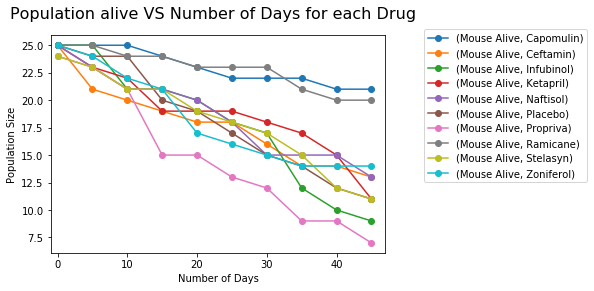

In [389]:
lines = mouse_survival_2.plot.line(marker="o")
lines.legend(bbox_to_anchor=(1.1, 1.05))
plt.suptitle('Population alive VS Number of Days for each Drug', fontsize=16)
lines.set_xlim(-1,47)
plt.xlabel('Number of Days') 
plt.ylabel('Population Size')


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

Text(0, 0.5, '% Change')

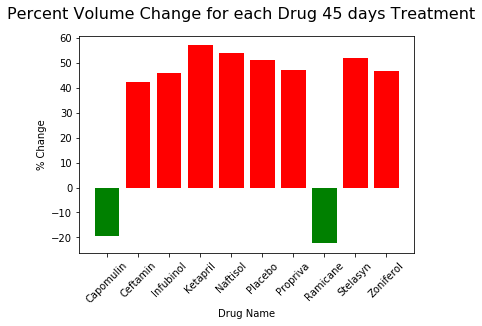

In [390]:
# Calculate the percent changes for each drug for response to treatment (Volume)
drug_list = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
percent_volume = []

for drug in drug_list:
    t0 = t_mean_2["Tumor Volume (mm3)"][drug][0]
    tf = t_mean_2["Tumor Volume (mm3)"][drug][45]
    
    percent_volume.append(round(((100/t0)*tf)-100,2))
#percent_volume
percent_volume_dic =  {'Drug': drug_list, 'Volume': percent_volume}
percent_volume_df = pd.DataFrame(percent_volume_dic)
percent_volume_df

#pd.DataFrame(percent_volume) 

#df_percent_volume
plt.bar(x=percent_volume_df["Drug"],height=percent_volume_df["Volume"],color=percent_volume_df["Volume"].apply(lambda x: 'r' if x>0 else 'g'))
plt.suptitle('Percent Volume Change for each Drug 45 days Treatment', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Drug Name')
plt.ylabel('% Change')
# Display the data to confirm


Text(0, 0.5, '% Change')

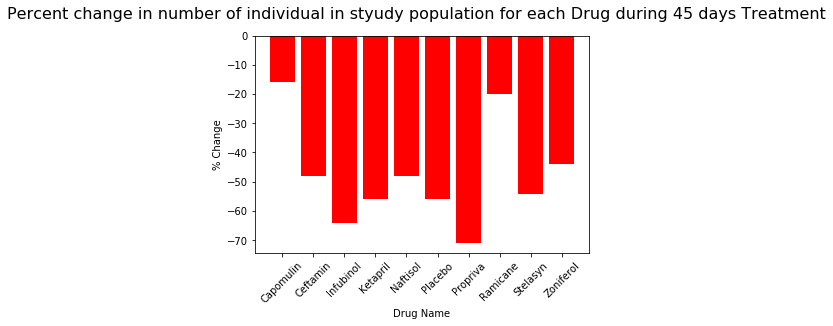

In [391]:
# Calculate the percent changes for population
drug_list = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
percent_survival = []

for drug in drug_list:
    t0 = mouse_survival_2["Mouse Alive"][drug][0]
    tf = mouse_survival_2["Mouse Alive"][drug][45]
    
    percent_survival.append(round(((100/t0)*tf)-100,2))
#percent_volume
percent_survival_dic =  {'Drug': drug_list, 'Population': percent_survival}
percent_survival_df = pd.DataFrame(percent_survival_dic)
percent_survival_df

plt.bar(x=percent_survival_df["Drug"],height=percent_survival_df["Population"],color=percent_survival_df["Population"].apply(lambda x: 'g' if x>0 else 'r'))
plt.suptitle('Percent change in number of individual in styudy population for each Drug during 45 days Treatment', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Drug Name')
plt.ylabel('% Change')
# Display the data to confirm